### Aim:

Generate dataset containing 216 variables of ToxCast "targets" for 175 drugs after dimension reduction via-PCA for modeling of DILI.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#magic command to print all output instead of only last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#read-in dili test targets with their NAS scores in binary or continuous format 
#use data in continuous format for PCA-based variable reduction

dtb=pd.read_csv("dili_targets_binary.csv")

dtc=pd.read_csv("dili_targets_continuous.csv")

#confirm order of indexes and columns and order within chnm column is identical across both dtb and dtc
dtb.head() 
dtc.head()

dtb.index.equals(dtc.index), dtb.columns.equals(dtc.columns), dtb.chnm.equals(dtc.chnm)

,chnm,ADCY5,ADORA1,ADORA2,ADORA2A,ADRA1A,ADRA1B,ADRA2A,ADRA2B,ADRB1,...,zf_jaw,zf_nc,zf_pe,zf_snou,zf_somi,zf_swim,zf_teratoscore,zf_tr,zf_trun,zf_yse
0,abacavir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,acetaminophen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,acitretin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,albendazole,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,alclofenac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,chnm,ADCY5,ADORA1,ADORA2,ADORA2A,ADRA1A,ADRA1B,ADRA2A,ADRA2B,ADRB1,...,zf_jaw,zf_nc,zf_pe,zf_snou,zf_somi,zf_swim,zf_teratoscore,zf_tr,zf_trun,zf_yse
0,abacavir,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
1,acetaminophen,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
2,acitretin,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
3,albendazole,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
4,alclofenac,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0


(True, True, True)

In [5]:
#Drop column containing drug name ("chnm") and check for correlation across all variables
dtc.drop("chnm", axis=1, inplace = True)

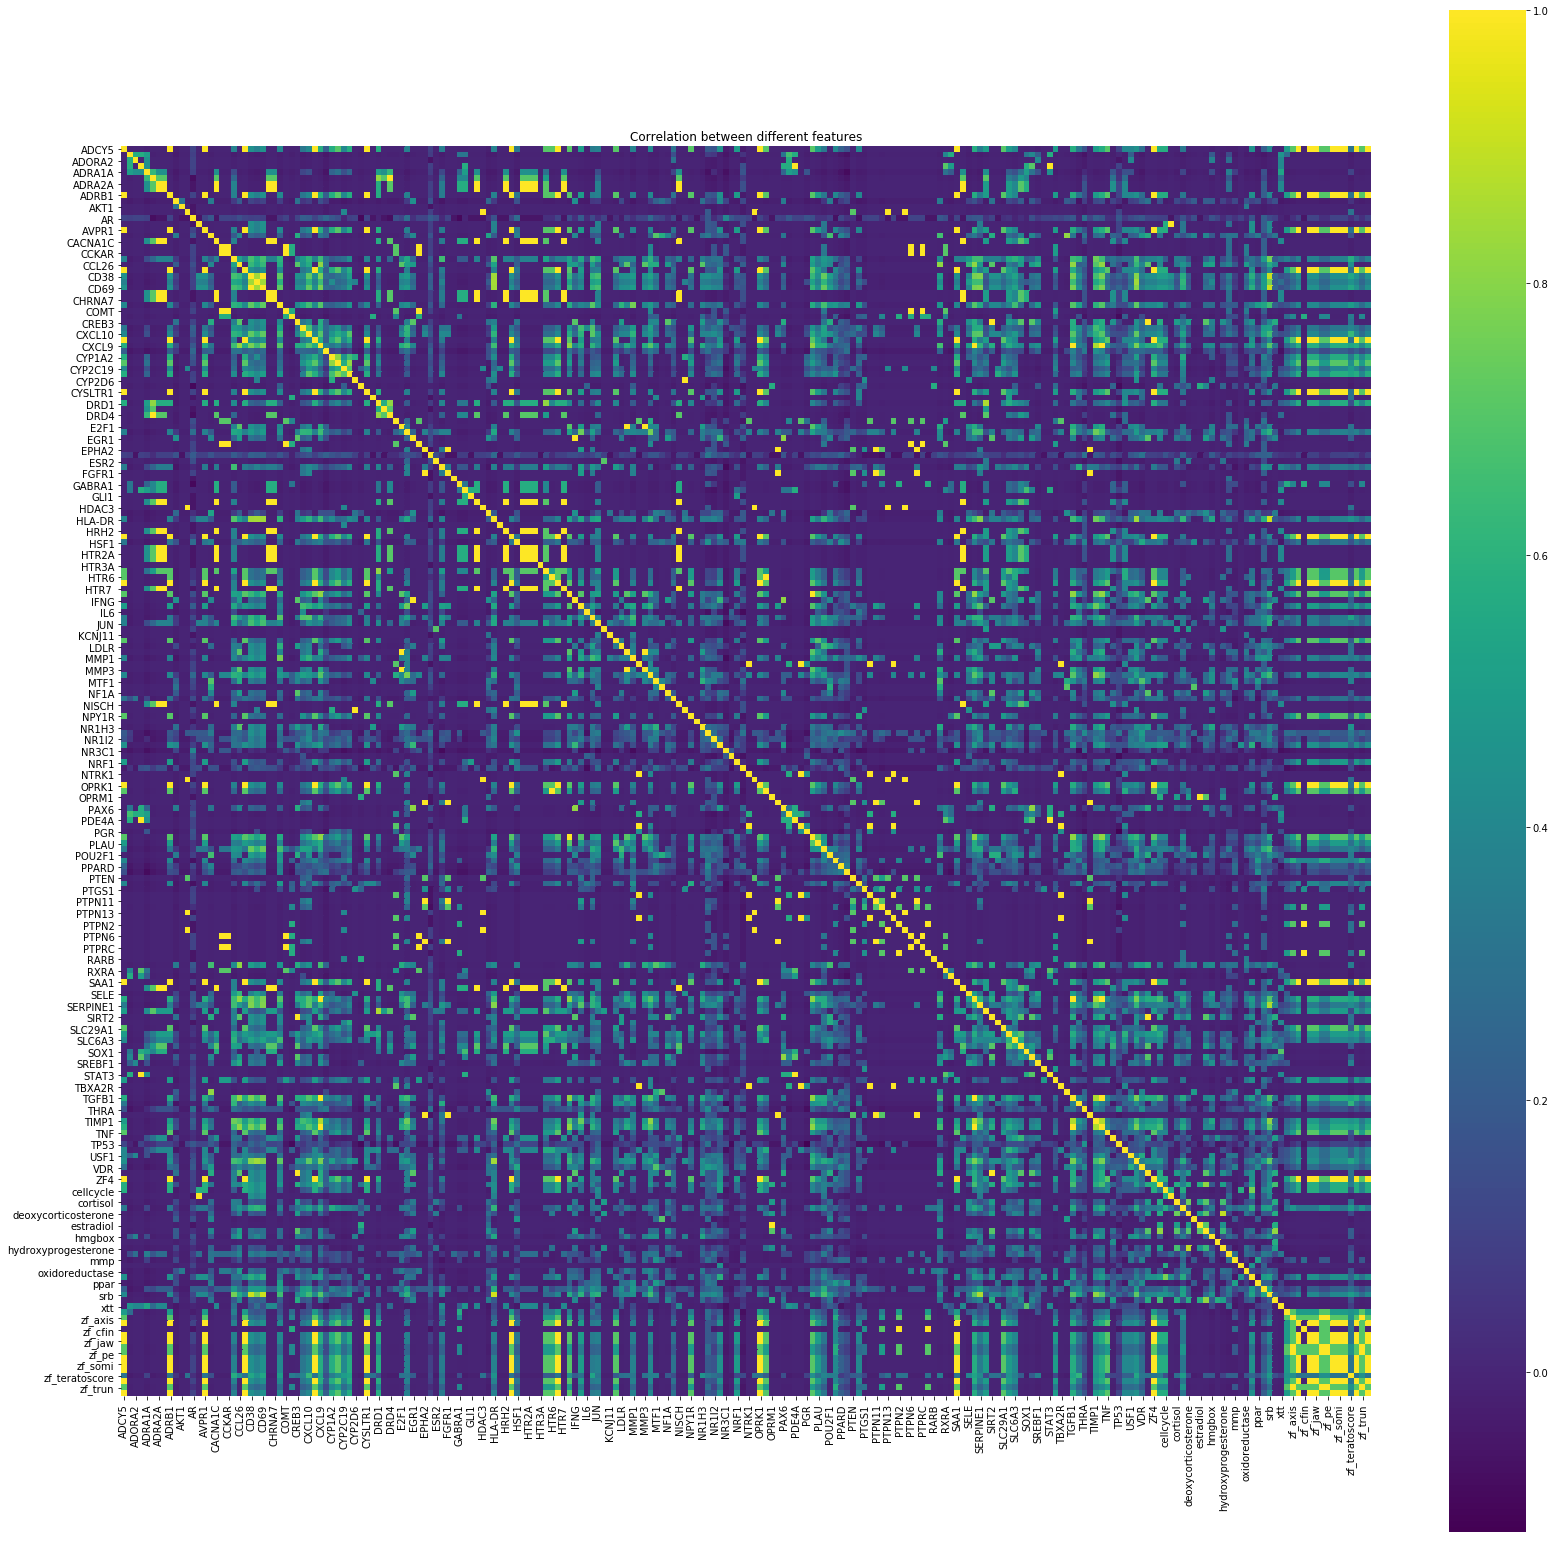

In [6]:
correlation = dtc.corr()
plt.figure(figsize=(28,28))
sns.heatmap(correlation, square=True,cmap='viridis')
plt.title('Correlation between different features')
plt.show();

In [7]:
# Scale the data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #instantiate StandardScaler class
dtc_scaled_ar= scaler.fit_transform(dtc) #fit-transform instantiated class and save to an numpy array
dtc_scaled=pd.DataFrame(dtc_scaled_ar, columns=dtc.columns) #saved "scaled" data to a dataframe

dtc_scaled.head()

,ADCY5,ADORA1,ADORA2,ADORA2A,ADRA1A,ADRA1B,ADRA2A,ADRA2B,ADRB1,AHR,...,zf_jaw,zf_nc,zf_pe,zf_snou,zf_somi,zf_swim,zf_teratoscore,zf_tr,zf_trun,zf_yse
0,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,4.064416,...,-0.07581,-0.107521,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581
1,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,...,-0.07581,-0.107521,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581
2,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,...,-0.07581,-0.107521,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581
3,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,4.056358,...,-0.07581,-0.107521,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581
4,-0.07581,-0.132068,-0.07581,-0.07581,-0.171499,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,...,-0.07581,-0.107521,-0.107521,-0.07581,-0.07581,-0.07581,-0.246183,-0.07581,-0.107521,-0.07581


In [8]:
# Fit PCA on scaled data

from sklearn.decomposition import PCA
pca = PCA().fit(dtc_scaled)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

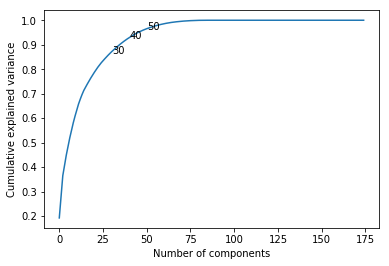

In [9]:
#Evaluate explained variance with increasing # of principal components

pca.explained_variance_ratio_[:10].sum() # first 10 principal components account for >60% of variance in data
pca.explained_variance_ratio_[:20].sum() # first 20 principal components account for >77% of variance in data
pca.explained_variance_ratio_[:30].sum() # first 30 principal components account for >86% of variance in data
pca.explained_variance_ratio_[:40].sum() # first 40 principal components account for >92% of variance in data
pca.explained_variance_ratio_[:50].sum() # first 50 principal components account for >96% of variance in data

# Plot relation between components and variance

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('30',xy=(30, .865))
plt.annotate('40',xy=(40, .924))
plt.annotate('50',xy=(50, .962))
plt.show();


In [10]:
#Fit PCA transformer to dataset so as to explain 90% of variance

x_pca=PCA(n_components=0.85)
eightyfive_percent_pca=x_pca.fit_transform(dtc_scaled)

#determine # of principal components and retrieve first 3 principal components (as an example)
x_pca.explained_variance_ # total of 36 principal components
x_pca.components_.T[:, 0:3]


array([41.73189108, 19.07511984, 18.44363168,  9.38815005,  8.86717167,
        7.91880639,  7.44123349,  6.80086128,  6.57165321,  5.87904025,
        5.47936396,  5.25951109,  4.35569876,  4.03409403,  3.63218787,
        2.92288903,  2.77755545,  2.72470663,  2.6360661 ,  2.53165398,
        2.42614048,  2.37556289,  2.19897089,  2.09529248,  1.94526881,
        1.79347306,  1.70990265,  1.68671608])

array([[ 1.35711495e-01, -9.67569889e-02,  3.83294506e-02],
       [-1.63451392e-03,  1.28612669e-02,  1.05266532e-02],
       [-4.19624144e-04,  6.67566299e-03,  1.74100373e-03],
       [-1.26214635e-03,  1.72745305e-02,  1.17500619e-02],
       [ 8.31292678e-03,  6.69494571e-02,  1.05866496e-01],
       [ 9.48545572e-03,  8.79728194e-02,  1.56151273e-01],
       [ 1.37060246e-02,  1.18521844e-01,  1.95056063e-01],
       [ 1.37060246e-02,  1.18521844e-01,  1.95056063e-01],
       [ 1.35711495e-01, -9.67569889e-02,  3.83294506e-02],
       [ 1.19221683e-02,  5.46391932e-02, -4.21492257e-02],
       [-2.56673371e-03, -1.58104840e-03, -1.37040256e-03],
       [-1.03896515e-03, -3.60068345e-03, -1.17345078e-03],
       [ 2.65124010e-02,  1.59290140e-02, -2.94431458e-02],
       [ 9.99639601e-03,  1.35352895e-02, -1.14183048e-02],
       [ 1.35711495e-01, -9.67569889e-02,  3.83294506e-02],
       [ 2.99670024e-02,  1.00278945e-01, -6.82445041e-02],
       [ 1.37060246e-02,  1.18521844e-01

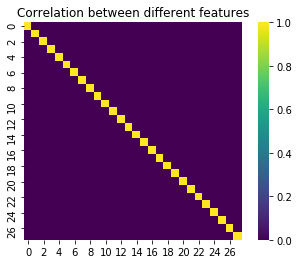

In [11]:
# correlation between principal components after PCA @ ~85% variance explained

correlation = pd.DataFrame(eightyfive_percent_pca).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')
plt.show(); # All principal components are orthogonal to each other

In [13]:
#Create dataframe of principal components 
pca_targets=pd.DataFrame(eightyfive_percent_pca, columns = ("P1", "P2", "P3", "P4", "P5", "P6",
                                           "P7", "P8", "P9", "P10", "P11", "P12",
                                           "P13", "P14", "P15", "P16", "P17", "P18",
                                           "P19", "P20", "P21", "P22", "P23", "P24",
                                           "P25", "P26", "P27", "P28"))

pca_targets.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
0,-1.453781,-0.645957,-0.042387,-0.613409,-0.383872,0.003563,-0.036099,-0.166559,-0.251330,-0.143600,...,-0.655201,0.332493,-0.384955,-0.103455,0.874200,-0.643686,0.654882,0.699779,0.421477,-0.002905
1,-0.280884,0.297014,1.704332,0.586057,0.406694,0.340701,1.252860,-0.431265,2.469549,-0.076037,...,-0.954097,-0.813639,0.222896,-0.263584,-1.537387,-1.949884,0.636464,-1.337835,-0.075963,-1.225050
2,-1.116905,-0.588255,-0.067545,-0.455004,-0.432180,0.553050,0.050969,-0.027998,-0.295202,-0.195749,...,0.516629,-0.236979,0.399888,0.569811,0.595930,0.550770,-0.300266,0.560164,-0.338131,-0.234198
3,-0.582517,1.004084,-1.160341,-0.468495,-0.503714,0.647676,-0.436439,0.350573,-0.063671,0.058293,...,0.523348,-1.409748,0.513968,0.543193,0.153357,2.287368,0.156084,1.410520,-0.504880,-0.437613
4,-1.401812,-0.811473,0.041537,-0.372151,-0.318848,0.315268,0.085781,-0.082962,-0.227885,-0.130233,...,-0.170069,0.207117,-0.221817,0.090859,0.541376,-0.275087,-0.236340,0.056372,0.188017,0.006071


In [14]:
#export dataframe of principal components - after appending drug names back to data post-PCA

frames=[dtb["chnm"],pca_targets]

dili_targets_post_pca=pd.concat(frames, axis=1)

dili_targets_post_pca.head()

dili_targets_post_pca.to_csv('dili_targets_post_pca.csv', index=False)

,chnm,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28
0,abacavir,-1.453781,-0.645957,-0.042387,-0.613409,-0.383872,0.003563,-0.036099,-0.166559,-0.251330,...,-0.655201,0.332493,-0.384955,-0.103455,0.874200,-0.643686,0.654882,0.699779,0.421477,-0.002905
1,acetaminophen,-0.280884,0.297014,1.704332,0.586057,0.406694,0.340701,1.252860,-0.431265,2.469549,...,-0.954097,-0.813639,0.222896,-0.263584,-1.537387,-1.949884,0.636464,-1.337835,-0.075963,-1.225050
2,acitretin,-1.116905,-0.588255,-0.067545,-0.455004,-0.432180,0.553050,0.050969,-0.027998,-0.295202,...,0.516629,-0.236979,0.399888,0.569811,0.595930,0.550770,-0.300266,0.560164,-0.338131,-0.234198
3,albendazole,-0.582517,1.004084,-1.160341,-0.468495,-0.503714,0.647676,-0.436439,0.350573,-0.063671,...,0.523348,-1.409748,0.513968,0.543193,0.153357,2.287368,0.156084,1.410520,-0.504880,-0.437613
4,alclofenac,-1.401812,-0.811473,0.041537,-0.372151,-0.318848,0.315268,0.085781,-0.082962,-0.227885,...,-0.170069,0.207117,-0.221817,0.090859,0.541376,-0.275087,-0.236340,0.056372,0.188017,0.006071


In [16]:
#merge dili_targets and drug names with DILI classification (mostDILI=1, all other DILI categories = 0)
mc_labeled=pd.read_csv("mc_var_labeled.csv")
mc_labeled.head()
mcl=mc_labeled.loc[:, ["chnm", "classificn"]]

tc_mcl=pd.merge(dili_targets_post_pca,mcl, on="chnm")

tc_mcl.head()

tc_mcl.to_csv('tc_pca_labeled.csv', index=False) #toxcast targets_post_pca with classification labels attached

,chnm,classificn,cmax,mol_wt,dailydose,logP,reactive_metabolites
0,ambrisentan,0,2.6124,378.42108,7.5,3.78,1
1,amrinone,0,13.7820,187.19795,500.0,-0.46,0
2,aztreonam,0,142.3860,435.43278,4000.0,-1.73,0
3,capecitabine,0,7.9309,359.35008,5600.0,0.40,0
4,carbidopa,0,0.6630,226.22915,70.0,-1.90,0


,chnm,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P20,P21,P22,P23,P24,P25,P26,P27,P28,classificn
0,abacavir,-1.453781,-0.645957,-0.042387,-0.613409,-0.383872,0.003563,-0.036099,-0.166559,-0.251330,...,0.332493,-0.384955,-0.103455,0.874200,-0.643686,0.654882,0.699779,0.421477,-0.002905,1
1,acetaminophen,-0.280884,0.297014,1.704332,0.586057,0.406694,0.340701,1.252860,-0.431265,2.469549,...,-0.813639,0.222896,-0.263584,-1.537387,-1.949884,0.636464,-1.337835,-0.075963,-1.225050,1
2,acitretin,-1.116905,-0.588255,-0.067545,-0.455004,-0.432180,0.553050,0.050969,-0.027998,-0.295202,...,-0.236979,0.399888,0.569811,0.595930,0.550770,-0.300266,0.560164,-0.338131,-0.234198,1
3,albendazole,-0.582517,1.004084,-1.160341,-0.468495,-0.503714,0.647676,-0.436439,0.350573,-0.063671,...,-1.409748,0.513968,0.543193,0.153357,2.287368,0.156084,1.410520,-0.504880,-0.437613,1
4,alclofenac,-1.401812,-0.811473,0.041537,-0.372151,-0.318848,0.315268,0.085781,-0.082962,-0.227885,...,0.207117,-0.221817,0.090859,0.541376,-0.275087,-0.236340,0.056372,0.188017,0.006071,1


In [17]:
##The end